In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## About Dataset
### Context
* This database is from a large US company (no name given for privacy reasons). The management department is worried about the relatively high turnover. They want to find ways to reduce the number of employees leaving the company and to better understand the situation, which employees are more likely to leave, and why.

### The data

* The HR department has assembled data on almost 10,000 employees who left the company between 2016-2020. They used information from exit interviews, performance reviews, and employee records.

* department - the department the employee belongs to.
* promoted - 1 if the employee was promoted in the previous 24 months, 0 otherwise.
* review - the composite score the employee received in their last evaluation.
* projects - how many projects the employee is involved in.
* salary - for confidentiality reasons, salary comes in three tiers: low, medium, high.
* tenure - how many years the employee has been at the company.
* satisfaction - a measure of employee satisfaction from surveys.
* bonus - 1 if the employee received a bonus in the previous 24 months, 0 otherwise.
* avg_hrs_month - the average hours the employee worked in a month.
* left - "yes" if the employee ended up leaving, "no" otherwise.

## Veri Kümesi Hakkında
### Bağlam
* Bu veri tabanı büyük bir ABD şirketine aittir (gizlilik nedeniyle isim verilmemiştir). Yönetim departmanı, nispeten yüksek ciro konusunda endişeli. Şirketten ayrılan çalışan sayısını azaltmanın yollarını bulmak ve durumu, hangi çalışanların ayrılma olasılığının daha yüksek olduğunu ve nedenini daha iyi anlamak istiyorlar.

### Veri

* İK departmanı, 2016-2020 yılları arasında şirketten ayrılan yaklaşık 10.000 çalışan hakkında veri topladı. Çıkış görüşmelerinden, performans incelemelerinden ve çalışan kayıtlarından alınan bilgileri kullandılar.

* departman - çalışanın ait olduğu departman.
* Terfi - Çalışan önceki 24 ayda terfi ettiyse 1, aksi halde 0.
* inceleme - çalışanın son değerlendirmesinde aldığı bileşik puan.
* projeler - çalışanın kaç projede yer aldığı.
* maaş - gizlilik nedeniyle, maaş üç kademede gelir: düşük, orta, yüksek.
* görev süresi - çalışanın şirkette kaç yıldır çalıştığı.
* memnuniyet - anketlerden elde edilen çalışan memnuniyetinin bir ölçüsü.
* ikramiye - Çalışan önceki 24 ayda ikramiye aldıysa 1, aksi takdirde 0.
* avg_hrs_month - çalışanın bir ayda çalıştığı ortalama saat.
* sol - çalışan sonunda ayrıldıysa "evet", aksi takdirde "hayır".

## Analysis Content 
* 1.[Python Libraries](#1)
* 2.[data loading](#2)
* 3.[EDA](#3)
* 4.[Modelling](#4) 
* 5.[Randomforest](#5) 


<a id="1"></a>
## 1.Python Libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from sklearn.preprocessing import scale,StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB,MultinomialNB
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
## 2.Data Loading

In [2]:
df=pd.read_csv("/kaggle/input/employee-turnover/employee_churn_data.csv")
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [3]:
df.tail()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes
9539,finance,0,0.626373,3,low,7.0,0.706455,1,185.920934,yes


<a id="3"></a>
## 3.EDA

In [4]:
# summary dataset

def summary(data):
    print("*****shape*****")
    print(data.shape)
    print("******information data******")
    print(data.info())
    print("******Missing values*****")
    print(data.isna().sum())
    print("*****Columns******")
    print(data.columns)
    print("******Quantiles*****")
    print(data.describe([0.15,0.25,0.35,0.5,0.65,0.75,0.9]).T)
    print("*********nunique********")
    print(data.nunique())

In [5]:
summary(df)

*****shape*****
(9540, 10)
******information data******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB
None
******Missing values*****
department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64
*****Column

* Verisetimizin  özetine erişmiş olduk;
* Verisetimiz 9540 gözlem ve 10 öznitelikten oluşmaktadır.
* Verisetimiz 7 sayısal 3 kategorik değişkenden oluşmaktadır.
* Verisetimizde eksik değerler yok
* Özniteliklerimizin istatistiksel özetine ulaştık,çeyrekler arası uzaklığa göre dağılımlar hakkında fikir sahibi olabiliriz.
* nunique ile her bir özniteliğin benzersiz değer sayılarına eriştik.Buradan kategorik değişkenlerin sınıf sayılarını gözlemleyebiliriz.

* We have access to the summary of our dataset;
* Our dataset consists of 9540 observations and 10 features.
* Our dataset consists of 7 numerical and 3 categorical variables.
* There are no missing values ​​in our dataset
* We have reached the statistical summary of our attributes, we can have an idea about the distributions according to the distance between the quartiles.
* With nunique we have accessed the unique value counts of each attribute. From here we can observe the class counts of the categorical variables.

In [6]:
for i in df.select_dtypes("object"):
    print(df[i].value_counts())
    print("*"*30)

sales          1883
retail         1541
operations     1522
engineering    1516
marketing       802
support         735
admin           423
finance         402
logistics       360
IT              356
Name: department, dtype: int64
******************************
medium    6611
high      1548
low       1381
Name: salary, dtype: int64
******************************
no     6756
yes    2784
Name: left, dtype: int64
******************************


In [7]:
# we have reached the number of employees working in different sectors in each department
# majority of employees earn an average salary
# the number of people quitting their job is too high, we need to get ahead of them

In [8]:
# herbir departmanda farklı sektörlerde çalışan eleman sayısına eriştik 
# çalışanların büyük çoğunluğu ortalama bir maaş alıyor
# işi bırakanların sayısı çok fazla ,bunların önüne geçmemiz lazım

In [9]:
df.sort_values("avg_hrs_month",ascending=False).head(30)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
5723,marketing,0,0.513217,3,low,12.0,0.741743,1,200.861656,no
7946,sales,0,0.615866,4,high,11.0,0.674152,1,199.377273,no
6456,operations,0,0.714813,4,low,11.0,0.533855,0,199.297775,no
5534,finance,0,0.654463,4,medium,11.0,0.762783,0,198.582251,no
7780,sales,0,0.583560,3,low,11.0,0.647896,0,198.166819,no
5867,support,1,0.710793,4,medium,11.0,0.654442,0,198.164130,no
7357,operations,0,0.780348,4,low,11.0,0.747597,0,197.915148,no
7857,operations,0,0.669697,4,low,11.0,0.653467,0,197.767340,no
8135,operations,0,0.665514,3,medium,11.0,0.598792,1,197.698552,no
8155,sales,0,0.640726,4,medium,11.0,0.580410,1,197.559283,no


In [20]:
# We can see that the employee quit when he worked too hard
# working hours need to be improved.

In [21]:
# Görebiliyoruz ki çalışan çok fazla çalıştığında işi bırakmış
# mesai saatlerinin iyileştirilmesi gerekir.

In [24]:
# look at statistics by salary status
# maaş durumuna göre istatistiklere bakalım

In [27]:
df.groupby("salary").describe()[["projects","tenure","bonus"]].T

salary                 high          low       medium
projects count  1548.000000  1381.000000  6611.000000
         mean      3.260336     3.304852     3.271971
         std       0.557075     0.576507     0.584598
         min       2.000000     2.000000     2.000000
         25%       3.000000     3.000000     3.000000
         50%       3.000000     3.000000     3.000000
         75%       4.000000     4.000000     4.000000
         max       5.000000     5.000000     5.000000
tenure   count  1548.000000  1381.000000  6611.000000
         mean      6.580749     6.556119     6.550446
         std       1.442925     1.434790     1.404980
         min       3.000000     3.000000     2.000000
         25%       5.000000     5.000000     5.000000
         50%       7.000000     7.000000     7.000000
         75%       8.000000     8.000000     8.000000
         max      11.000000    12.000000    11.000000
bonus    count  1548.000000  1381.000000  6611.000000
         mean      0.213824     0.225199     0.208894
         std       0.410137     0.417865     0.406549
         min       0.000000     0.000000     0.000000
         25%       0.000000     0.000000     0.000000
         50%       0.000000     0.000000     0.000000
         75%       0.000000     0.000000     0.000000
         max       1.000000     1.000000     1.000000

* From here we can deduce;
* Regardless of the salary category, the project publishing rates are almost the same, even those with low salaries published more projects, there is something wrong here..
* working years are almost the same regardless of salary category
* The bonus rates given are very low, if you do this, you will lose the employee.

* Buradan şunları çıkartabiliriz;
* maaş kategorisine bakılmaksızın proje yayımlama oranları neredeyse aynı hatta düşük maaş alanlar daha çok proje yayımlamış,burada ters giden bir durum var..
* maaş kategorisine bakılmaksız çalışma yılları hemen hemen aynı
* Verilen ikramiye oranları çok düşük,böyle yaparsanız çalışan kaybedersiniz.

In [28]:
# take a look at the statistical summary by department;
# departmana göre istatiksel özete göz atalım;

In [33]:
df.groupby("department").describe()[["projects","tenure","bonus","satisfaction"]].T

department                  IT       admin  engineering     finance  \
projects     count  356.000000  423.000000  1516.000000  402.000000   
             mean     3.289326    3.278960     3.263852    3.293532   
             std      0.598589    0.557335     0.586121    0.622446   
             min      2.000000    2.000000     2.000000    2.000000   
             25%      3.000000    3.000000     3.000000    3.000000   
             50%      3.000000    3.000000     3.000000    3.000000   
             75%      4.000000    4.000000     4.000000    4.000000   
             max      5.000000    5.000000     5.000000    5.000000   
tenure       count  356.000000  423.000000  1516.000000  402.000000   
             mean     6.609551    6.498818     6.558047    6.440299   
             std      1.420898    1.419022     1.412320    1.363093   
             min      2.000000    2.000000     3.000000    3.000000   
             25%      6.000000    5.000000     5.000000    5.000000   
             50%      7.000000    6.000000     7.000000    6.000000   
             75%      8.000000    8.000000     8.000000    7.000000   
             max     11.000000   10.000000    11.000000   11.000000   
bonus        count  356.000000  423.000000  1516.000000  402.000000   
             mean     0.221910    0.186761     0.211082    0.231343   
             std      0.416116    0.390181     0.408211    0.422217   
             min      0.000000    0.000000     0.000000    0.000000   
             25%      0.000000    0.000000     0.000000    0.000000   
             50%      0.000000    0.000000     0.000000    0.000000   
             75%      0.000000    0.000000     0.000000    0.000000   
             max      1.000000    1.000000     1.000000    1.000000   
satisfaction count  356.000000  423.000000  1516.000000  402.000000   
             mean     0.515818    0.519444     0.504944    0.497183   
             std      0.159384    0.160904     0.158864    0.159629   
             min      0.164511    0.082504     0.063567    0.092752   
             25%      0.391811    0.414269     0.384802    0.381984   
             50%      0.500748    0.524451     0.497888    0.489862   
             75%      0.649673    0.640818     0.618698    0.622393   
             max      0.918924    1.000000     0.982158    0.913206   

department           logistics   marketing   operations       retail  \
projects     count  360.000000  802.000000  1522.000000  1541.000000   
             mean     3.275000    3.280549     3.271353     3.266061   
             std      0.601241    0.573963     0.572738     0.564602   
             min      2.000000    2.000000     2.000000     2.000000   
             25%      3.000000    3.000000     3.000000     3.000000   
             50%      3.000000    3.000000     3.000000     3.000000   
             75%      4.000000    4.000000     4.000000     4.000000   
             max      5.000000    5.000000     5.000000     5.000000   
tenure       count  360.000000  802.000000  1522.000000  1541.000000   
             mean     6.527778    6.503741     6.608410     6.591175   
             std      1.425711    1.438063     1.428233     1.392568   
             min      2.000000    3.000000     3.000000     3.000000   
             25%      5.000000    5.000000     6.000000     6.000000   
             50%      6.500000    6.000000     7.000000     7.000000   
             75%      8.000000    8.000000     8.000000     8.000000   
             max     10.000000   12.000000    11.000000    11.000000   
bonus        count  360.000000  802.000000  1522.000000  1541.000000   
             mean     0.208333    0.219451     0.206965     0.218689   
             std      0.406682    0.414133     0.405263     0.413491   
             min      0.000000    0.000000     0.000000     0.000000   
             25%      0.000000    0.000000     0.000000     0.000000   
             50%      0.000000    0.000000     0.000000     0.000000   


* finans departmanı nispeten daha çok proje yayımlamış
* çalışma yılları birbirine yakın
* memnuniyet oranlarına bakınca insan kaynakları ve yöneticiler daha memnun

* finans departmanı nispeten daha çok proje yayımlamış
* çalışma yılları birbirine yakın
* memnuniyet oranlarına bakınca insan kaynakları ve yöneticiler daha memnun

In [35]:
# let's take a look at the statistical summary by quitting status
# işi bırakma durumuna göre istatistiksel özete göz atalım

In [38]:
df.groupby("left").describe()[["projects","tenure","bonus","satisfaction"]].T

left                         no          yes
projects     count  6756.000000  2784.000000
             mean      3.279455     3.263649
             std       0.579490     0.578225
             min       2.000000     2.000000
             25%       3.000000     3.000000
             50%       3.000000     3.000000
             75%       4.000000     4.000000
             max       5.000000     5.000000
tenure       count  6756.000000  2784.000000
             mean      6.546625     6.579382
             std       1.456414     1.310624
             min       2.000000     2.000000
             25%       5.000000     6.000000
             50%       6.000000     7.000000
             75%       8.000000     8.000000
             max      12.000000     9.000000
bonus        count  6756.000000  2784.000000
             mean      0.215068     0.204741
             std       0.410900     0.403585
             min       0.000000     0.000000
             25%       0.000000     0.000000
             50%       0.000000     0.000000
             75%       0.000000     0.000000
             max       1.000000     1.000000
satisfaction count  6756.000000  2784.000000
             mean      0.505634     0.502244
             std       0.159931     0.155167
             min       0.000000     0.086249
             25%       0.389036     0.382483
             50%       0.504073     0.491455
             75%       0.624945     0.615496
             max       1.000000     0.980994

In [39]:
df[(df.projects==5) & (df.left=="yes")]

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
3524,sales,0,0.785969,5,medium,5.0,0.454978,0,180.736221,yes
3588,support,0,0.651736,5,high,6.0,0.460405,0,184.060617,yes
3617,operations,0,0.624843,5,medium,9.0,0.373691,0,191.340739,yes
3665,logistics,0,0.788979,5,medium,6.0,0.443882,0,184.376830,yes
3851,engineering,0,0.779416,5,medium,5.0,0.430375,0,180.554078,yes
3883,retail,0,0.854736,5,medium,5.0,0.344743,0,180.097851,yes
3968,support,0,0.786576,5,medium,5.0,0.340663,0,179.107798,yes
4080,engineering,0,0.842328,5,medium,5.0,0.348223,0,180.058674,yes
4289,logistics,0,0.704434,5,medium,6.0,0.382317,0,182.993667,yes
4302,operations,0,0.705975,5,medium,6.0,0.303816,0,183.505640,yes


In [42]:
len(df[df.projects==5])

71

In [43]:
# 5 proje yayımlamış olupta işten ayrılan elemanlara eriştik
# çoğunluk bonus almamış,çalışma saatleri çok yüksek
# 5 yıl çalışan eleman saysı 71 bunların 20 tanesi işten ayrılmış.

In [44]:
# 5 proje yayımlamış olupta işten ayrılan elemanlara eriştik
# çoğunluk bonus almamış,çalışma saatleri çok yüksek
# 5 yıl çalışan eleman saysı 71 bunların 20 tanesi işten ayrılmış.

In [46]:
df[(df.salary=="high") & (df.left=="yes")]

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
3351,retail,0,0.570142,4,high,6.0,0.704609,0,181.835015,yes
3389,retail,0,0.833557,3,high,5.0,0.508392,0,178.613723,yes
3394,marketing,0,0.641999,3,high,7.0,0.458783,0,185.432031,yes
3398,logistics,0,0.752045,2,high,5.0,0.556001,1,181.230924,yes
3403,finance,0,0.631174,3,high,7.0,0.540458,0,185.326557,yes
...,...,...,...,...,...,...,...,...,...,...
9523,sales,0,0.631295,3,high,8.0,0.577073,0,188.603161,yes
9525,engineering,0,0.756849,3,high,8.0,0.732554,0,187.792071,yes
9527,sales,0,0.735405,4,high,8.0,0.572918,1,188.973366,yes
9528,marketing,0,0.741918,3,high,8.0,0.387040,0,189.205231,yes


In [47]:
len(df[df.salary=="high"])

1548

In [48]:
#there are 1548 employees with high salaries, 442 of them quit
#maaşı yüksek olan 1548 çalışan var,bunlardan 442 tanesi işten ayrılmış

In [61]:
# maaşı yüksek olup işi bırakanlar
len(df[(df.salary=="high") & (df.left=="yes")])/len(df[df.salary=="high"])

0.28552971576227393

In [51]:
df[(df.salary=="low") & (df.left=="yes")]

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
1078,sales,0,0.600301,3,low,6.0,0.657108,0,182.426505,yes
1839,retail,0,0.559148,3,low,6.0,0.559136,0,183.438258,yes
2952,sales,0,0.753666,4,low,5.0,0.539612,0,180.903977,yes
3186,marketing,0,0.585958,3,low,6.0,0.617453,0,181.752999,yes
3396,operations,0,0.674539,2,low,7.0,0.441500,0,185.936968,yes
...,...,...,...,...,...,...,...,...,...,...
9510,sales,0,0.680446,4,low,8.0,0.651176,1,187.517418,yes
9514,admin,0,0.664915,3,low,8.0,0.445933,0,189.244414,yes
9530,engineering,0,0.651929,4,low,7.0,0.745873,0,187.114221,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes


In [52]:
len(df[df.salary=="low"])

1381

In [53]:
# there are 1381 employees with low salaries, 391 of them quit their jobs
# maaaşı düşük olan 1381 eleman var,bu elemanlardan 391 tanesi işi bırakmış

In [62]:
# maaşı düşük olup işi bırakanlar
len(df[(df.salary=="low") & (df.left=="yes")])/len(df[df.salary=="low"])

0.2831281679942071

In [54]:
df[(df.salary=="low") & (df.left=="no")]

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
8,sales,0,0.652818,4,low,6.0,0.678696,0,183.655790,no
12,marketing,0,0.611419,3,low,6.0,0.502041,0,183.666686,no
16,IT,0,0.679621,4,low,6.0,0.480245,0,183.423787,no
17,admin,0,0.471118,4,low,5.0,0.887439,0,180.443724,no
...,...,...,...,...,...,...,...,...,...,...
8147,logistics,0,0.673586,4,low,7.0,0.285597,1,186.937039,no
8149,support,0,0.678025,3,low,9.0,0.484836,0,190.776048,no
8154,retail,0,0.638950,4,low,7.0,0.298651,0,184.722219,no
8675,finance,0,0.556106,3,low,7.0,0.660243,0,186.714146,no


In [55]:
len(df[(df.left=="no")])

6756

In [57]:
# there are 6756 employees with low salaries, 990 of them quit their jobs
# maaşı düşük olan 6756 eleman var,bu elemanlardan 990 tanesi işi bırakmış

In [60]:
# maaşı düşük olup işi bırakanların yüzdesi
len(df[(df.salary=="low") & (df.left=="no")])/len(df[(df.left=="no")])

0.14653641207815277

In [63]:
## Missing value query

df.isna().sum()

department       0
promoted         0
review           0
projects         0
salary           0
tenure           0
satisfaction     0
bonus            0
avg_hrs_month    0
left             0
dtype: int64

In [65]:
# there are no missing values in our dataset
# verisetimizde eksik değer yok

In [68]:
#Let's create a list for numeric and categorical variables
#sayısal ve kategorik değişkenler için birer liste oluşturalım

In [4]:
num_list=[i for i in df.select_dtypes(include=["int64","float64"])]
cat_list=[i for i in df.select_dtypes("object")]

In [5]:
num_list

['promoted',
 'review',
 'projects',
 'tenure',
 'satisfaction',
 'bonus',
 'avg_hrs_month']

In [6]:
cat_list

['department', 'salary', 'left']

In [13]:
## outlier problem

* Let's look at the distribution state of our dataset, we can have information about the outlier accordingly

* verisetimizin dağılım durumuna bakalım,buna göre aykırı değer hakkında bilgi sahibi olabiliriz

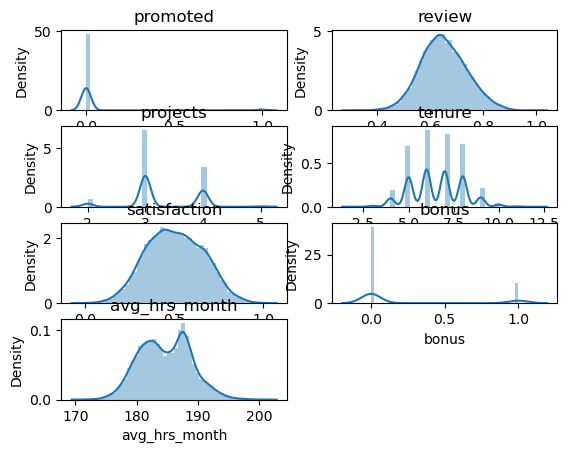

In [77]:
k=1
for i in df.loc[:,num_list]:
    plt.subplot(4,2,k)
    sns.distplot(df[i])
    plt.title(i)
    k+=1

In [14]:
df.describe([0.15,0.25,0.35,0.5,0.65,0.75,0.9]).T

,count,mean,std,min,15%,25%,35%,50%,65%,75%,90%,max
promoted,9540.0,0.030294,0.171403,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
review,9540.0,0.651826,0.085307,0.31000,0.565130,0.592884,0.616170,0.647456,0.681370,0.708379,0.765393,1.000000
projects,9540.0,3.274843,0.579136,2.00000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,5.000000
tenure,9540.0,6.556184,1.415432,2.00000,5.000000,5.000000,6.000000,7.000000,7.000000,8.000000,8.000000,12.000000
satisfaction,9540.0,0.504645,0.158555,0.00000,0.335051,0.386801,0.433915,0.500786,0.570781,0.622607,0.714491,1.000000
bonus,9540.0,0.212055,0.408785,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
avg_hrs_month,9540.0,184.661571,4.144831,171.37406,180.172303,181.472085,182.634610,184.628796,186.776679,187.728708,189.772293,200.861656


In [15]:
# There are very rare outliers in our dataset, we will not remove outliers
# Verisetimizde aykırı çok nadir aykırı değerler var,aykırı değerleri gidermeyeceğiz

In [84]:
## Data Visualize

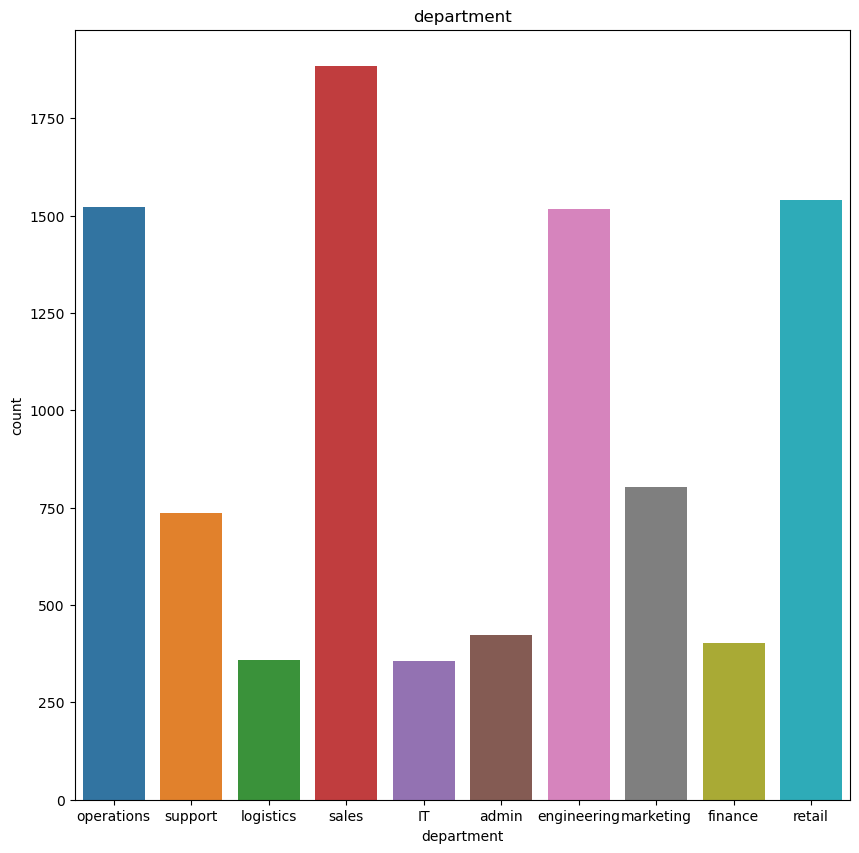

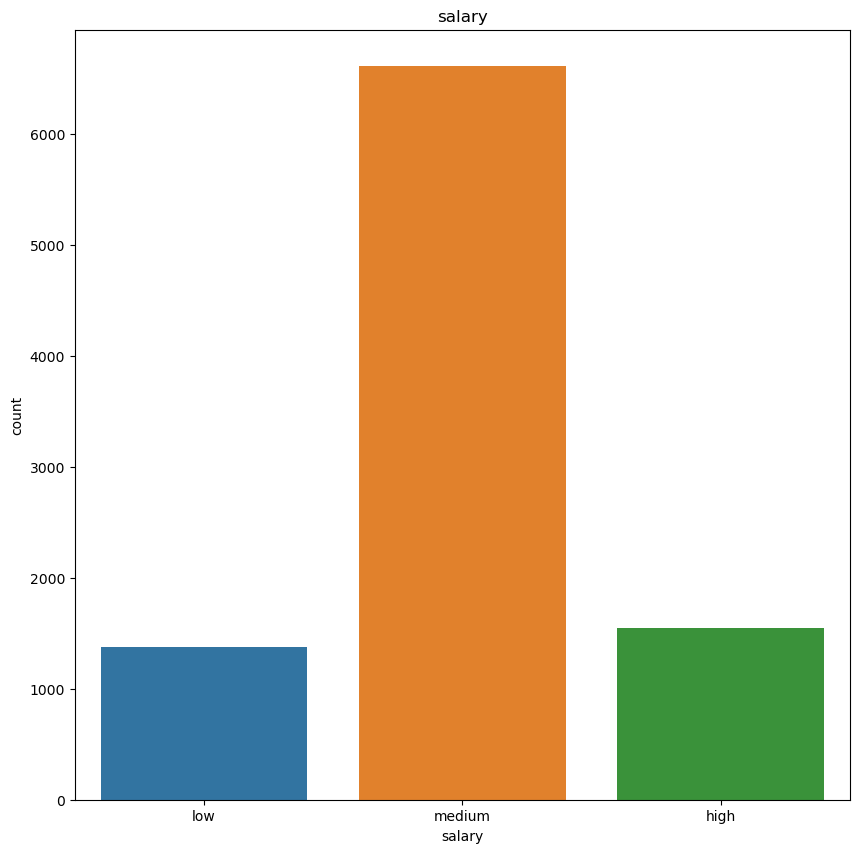

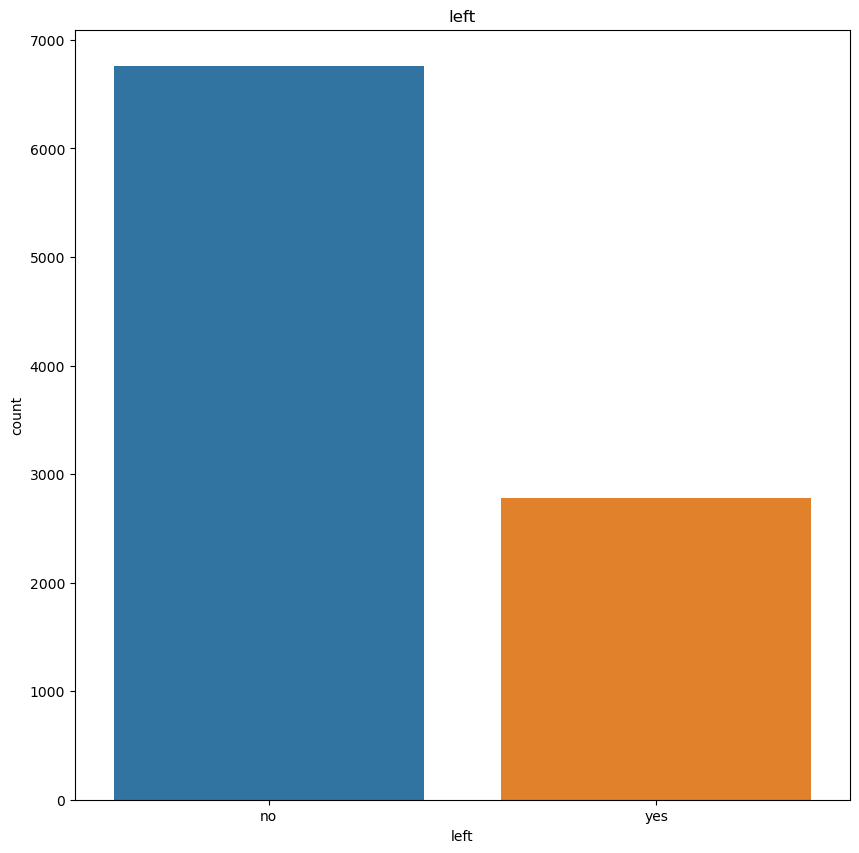

In [16]:
#  categorical analysis

for i in cat_list:
    plt.figure(figsize=(10,10))
    sns.countplot(x=i,data=df.loc[:,cat_list])
    plt.title(i)

In [17]:
# numerical analysis

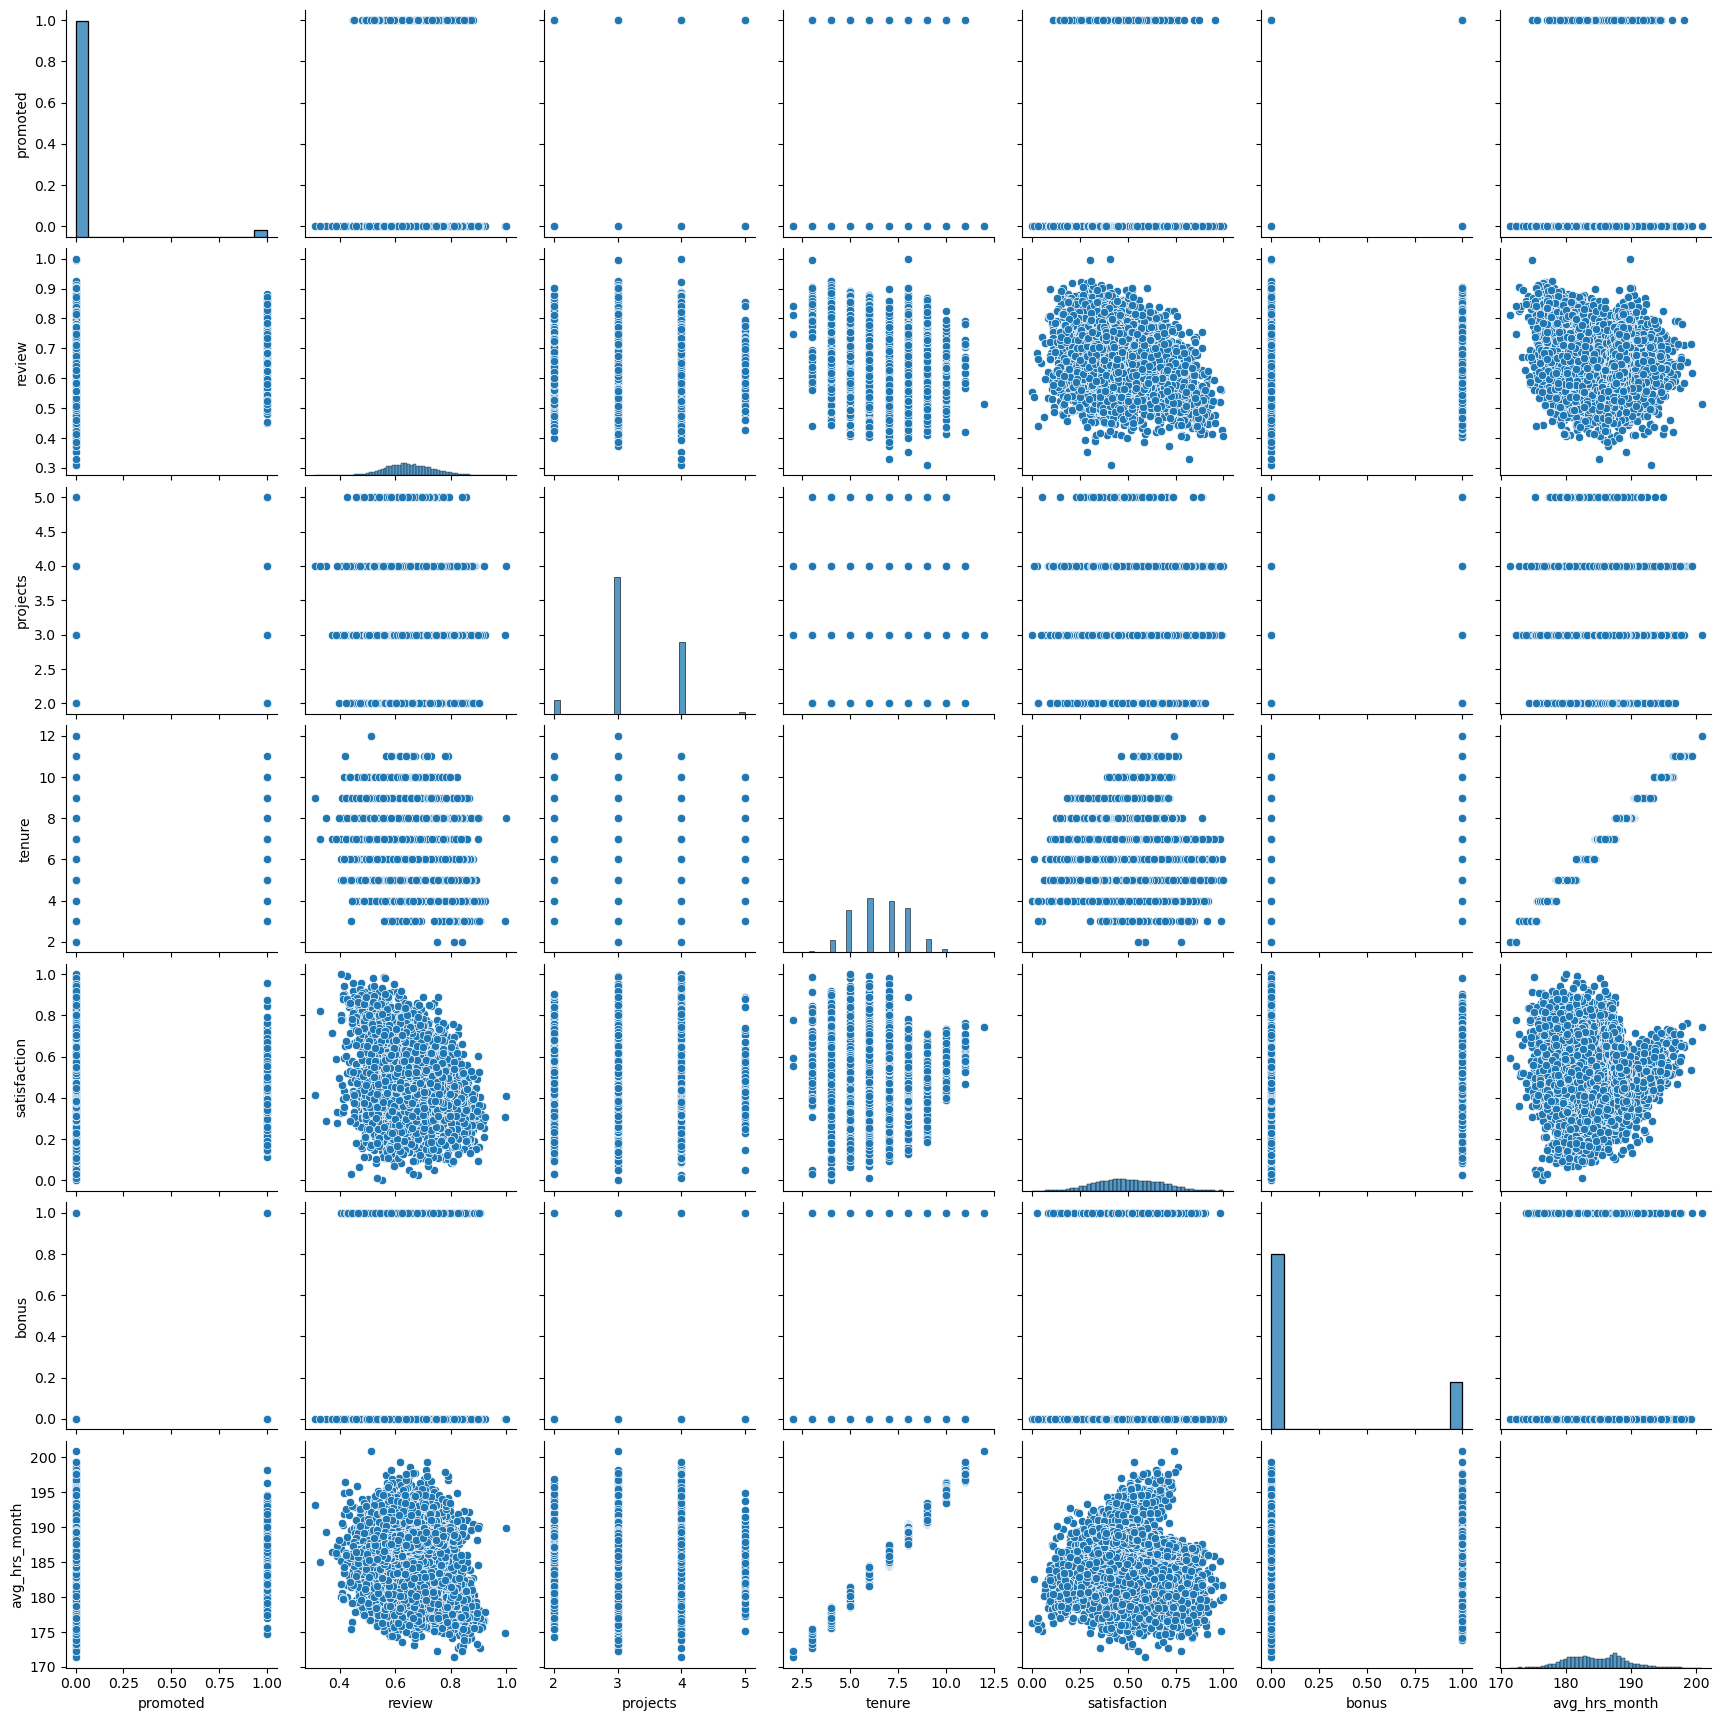

In [19]:
sns.pairplot(df.loc[:,num_list]);

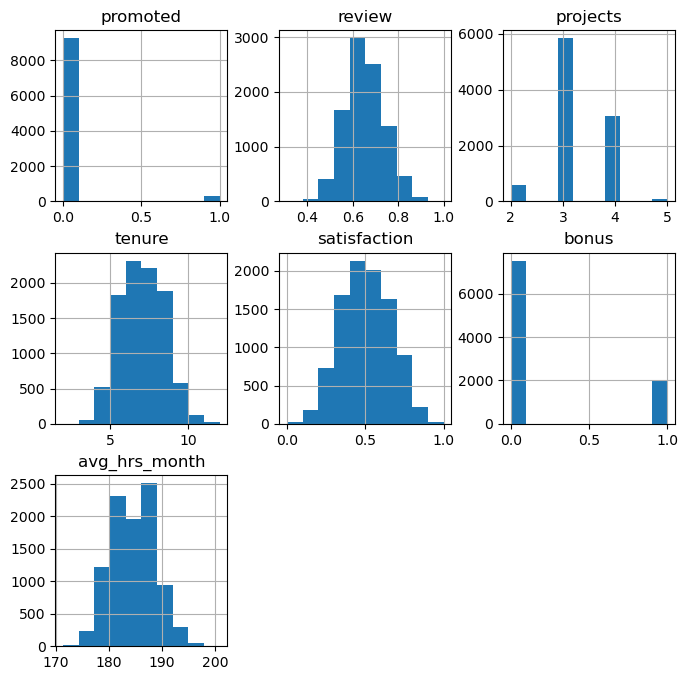

In [20]:
df.hist(figsize=(8,8));

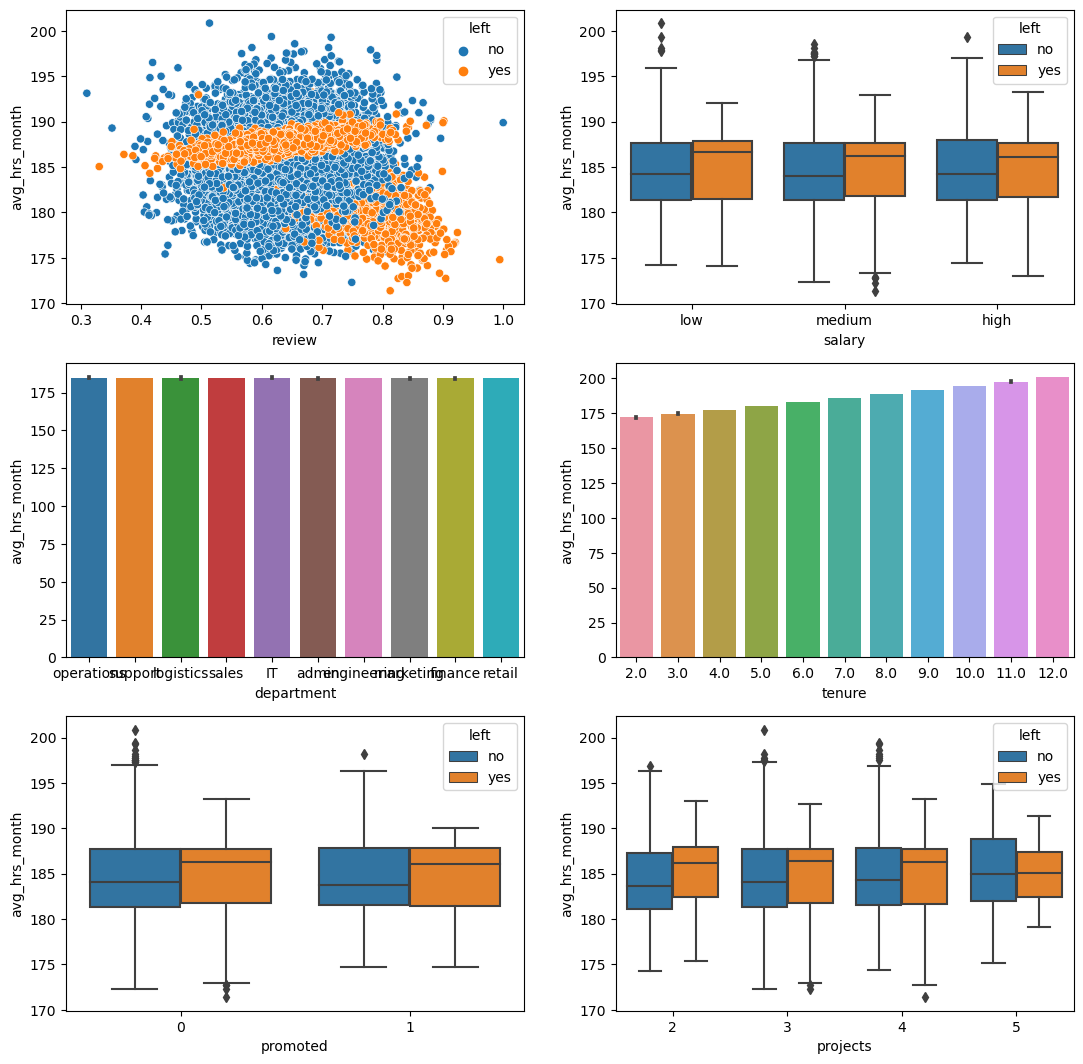

In [33]:
plt.figure(figsize=(13,13))
plt.subplot(3,2,1)
sns.scatterplot(x="review",y="avg_hrs_month",hue="left",data=df)
plt.subplot(3,2,2)
sns.boxplot(x="salary",y="avg_hrs_month",hue="left",data=df)
plt.subplot(3,2,3)
sns.barplot(x="department",y="avg_hrs_month",data=df)
plt.subplot(3,2,4)
sns.barplot(x="tenure",y="avg_hrs_month",data=df)
plt.subplot(3,2,5)
sns.boxplot(x="promoted",y="avg_hrs_month",data=df,hue="left")
plt.subplot(3,2,6)
sns.boxplot(x="projects",y="avg_hrs_month",data=df,hue="left")
plt.show()

In [85]:
## Encoding

In [36]:
df.select_dtypes(include="object").head()

,department,salary,left
0,operations,low,no
1,operations,medium,no
2,support,medium,no
3,logistics,high,no
4,sales,high,no


In [37]:
# 2 farklı encosing yöntemi kullanacağım;
# I will use 2 different encosing methods;

In [38]:
# Label Encoding

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le=LabelEncoder()

In [9]:
df.salary=le.fit_transform(df.salary)

In [10]:
# one-hot encoding

In [11]:
dms=pd.get_dummies(df[["department","left"]])

In [12]:
dms

,department_IT,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,left_no,left_yes
0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9535,0,0,0,0,0,0,1,0,0,0,0,1
9536,0,0,0,0,1,0,0,0,0,0,0,1
9537,0,0,0,0,0,0,1,0,0,0,0,1
9538,1,0,0,0,0,0,0,0,0,0,0,1


In [13]:
df.drop(["department","left"],axis=1,inplace=True)

In [14]:
df=pd.concat([df,dms],axis=1)
df

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,department_IT,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,left_no,left_yes
0,0,0.577569,3,1,5.0,0.626759,0,180.866070,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0.751900,3,2,6.0,0.443679,0,182.708149,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0.722548,3,2,6.0,0.446823,0,184.416084,0,0,0,0,0,0,0,0,0,1,1,0
3,0,0.675158,4,0,8.0,0.440139,0,188.707545,0,0,0,0,1,0,0,0,0,0,1,0
4,0,0.676203,3,0,5.0,0.577607,1,179.821083,0,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9535,0,0.610988,4,2,8.0,0.543641,0,188.155738,0,0,0,0,0,0,1,0,0,0,0,1
9536,0,0.746887,3,2,8.0,0.549048,0,188.176164,0,0,0,0,1,0,0,0,0,0,0,1
9537,0,0.557980,3,1,7.0,0.705425,0,186.531008,0,0,0,0,0,0,1,0,0,0,0,1
9538,0,0.584446,4,2,8.0,0.607287,1,187.641370,1,0,0,0,0,0,0,0,0,0,0,1


In [79]:
# encoding işlemlerimizi yaptığımıza göre Korelasyon Analizlerimizi yapalım
# Now that we have done our encoding operations, let's do our Correlation Analysis

In [80]:
## Correlation Analysis

In [81]:
# heatmap 

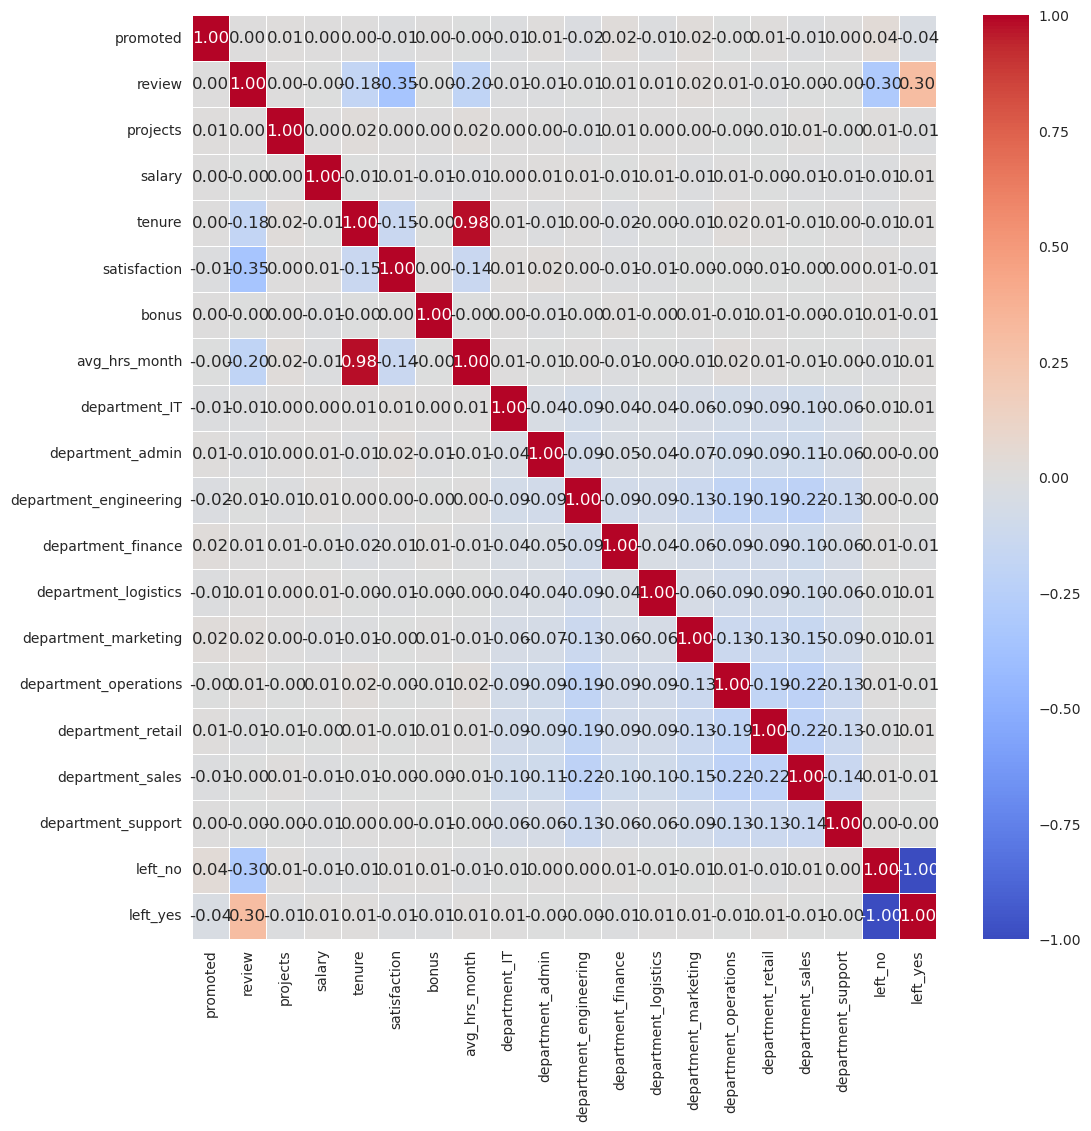

In [99]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,linewidths=0.6,fmt=".2f",cmap="coolwarm");

In [15]:
# yüksek korelasyonları kaldıralım;
# remove high correlations;

In [16]:
df.drop("left_no",axis=1,inplace=True)
df.head()

,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,department_IT,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,left_yes
0,0,0.577569,3,1,5.0,0.626759,0,180.866070,0,0,0,0,0,0,1,0,0,0,0
1,0,0.751900,3,2,6.0,0.443679,0,182.708149,0,0,0,0,0,0,1,0,0,0,0
2,0,0.722548,3,2,6.0,0.446823,0,184.416084,0,0,0,0,0,0,0,0,0,1,0
3,0,0.675158,4,0,8.0,0.440139,0,188.707545,0,0,0,0,1,0,0,0,0,0,0
4,0,0.676203,3,0,5.0,0.577607,1,179.821083,0,0,0,0,0,0,0,0,1,0,0


In [17]:
# tenure ve avg_hrs_month arasında yüksek bir ilişki var,önem derecelerine bakalım
# there is a high correlation between tenure and avg_hrs_month, let's look at their severity

In [18]:
cor=df.corr()["left_yes"].sort_values(ascending=False)
pd.DataFrame({"column":cor.index,"Correlation with left_yes":cor.values})


,column,Correlation with left_yes
0,left_yes,1.000000
1,review,0.304294
2,department_retail,0.013345
3,tenure,0.010521
4,salary,0.009589
5,avg_hrs_month,0.009008
6,department_marketing,0.007443
7,department_IT,0.007434
8,department_logistics,0.007192
9,department_support,-0.002154


In [19]:
df.drop("avg_hrs_month",axis=1,inplace=True)
df.head()

,promoted,review,projects,salary,tenure,satisfaction,bonus,department_IT,department_admin,department_engineering,department_finance,department_logistics,department_marketing,department_operations,department_retail,department_sales,department_support,left_yes
0,0,0.577569,3,1,5.0,0.626759,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0.751900,3,2,6.0,0.443679,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0.722548,3,2,6.0,0.446823,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0.675158,4,0,8.0,0.440139,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0.676203,3,0,5.0,0.577607,1,0,0,0,0,0,0,0,0,1,0,0


<a id="5"></a>
## 5.Modelling

In [20]:
X=df.drop("left_yes",axis=1)
y=df["left_yes"]

In [21]:
# train-test split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [23]:
!pip install catboost

In [24]:
!pip install lightgbm

In [25]:
!pip install xgboost

In [26]:
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [27]:
# models 

log=LogisticRegression().fit(X_train,y_train)
naiv=BernoulliNB().fit(X_train,y_train)
knn=KNeighborsClassifier().fit(X_train,y_train)
svm=SVC().fit(X_train,y_train)
mlpc=MLPClassifier().fit(X_train,y_train)
dtc=DecisionTreeClassifier().fit(X_train,y_train)
rf=RandomForestClassifier().fit(X_train,y_train)
xgb=XGBClassifier().fit(X_train,y_train)
gbm=GradientBoostingClassifier().fit(X_train,y_train)
lgb=LGBMClassifier().fit(X_train,y_train)
catbost=CatBoostClassifier().fit(X_train,y_train)


Learning rate set to 0.024537
0:	learn: 0.6721725	total: 60ms	remaining: 59.9s
1:	learn: 0.6549011	total: 64.2ms	remaining: 32s
2:	learn: 0.6357425	total: 68ms	remaining: 22.6s
3:	learn: 0.6198983	total: 71.7ms	remaining: 17.9s
4:	learn: 0.6036761	total: 83.5ms	remaining: 16.6s
5:	learn: 0.5876536	total: 87ms	remaining: 14.4s
6:	learn: 0.5733084	total: 90.5ms	remaining: 12.8s
7:	learn: 0.5609589	total: 94.2ms	remaining: 11.7s
8:	learn: 0.5487560	total: 97.8ms	remaining: 10.8s
9:	learn: 0.5386423	total: 102ms	remaining: 10.1s
10:	learn: 0.5283311	total: 105ms	remaining: 9.46s
11:	learn: 0.5189284	total: 109ms	remaining: 8.95s
12:	learn: 0.5109978	total: 112ms	remaining: 8.52s
13:	learn: 0.5023562	total: 116ms	remaining: 8.14s
14:	learn: 0.4941998	total: 118ms	remaining: 7.78s
15:	learn: 0.4868784	total: 121ms	remaining: 7.45s
16:	learn: 0.4802278	total: 125ms	remaining: 7.21s
17:	learn: 0.4726689	total: 128ms	remaining: 6.99s
18:	learn: 0.4675652	total: 132ms	remaining: 6.8s
19:	learn: 

In [117]:
# model değerlendirme

In [28]:
models=[log,naiv,knn,svm,mlpc,dtc,rf,xgb,gbm,lgb,catbost]

In [29]:
# 1.accuracy score

In [30]:
def ML(y,models):
    y_pred=models.predict(X_test)
    accuary=accuracy_score(y_test,y_pred)
    return accuary

In [31]:
for i in models:
     print(i,"Algorithm succed rate :",ML("left_yes",i))

LogisticRegression() Algorithm succed rate : 0.7232704402515723
BernoulliNB() Algorithm succed rate : 0.6981132075471698
KNeighborsClassifier() Algorithm succed rate : 0.7693920335429769
SVC() Algorithm succed rate : 0.6981132075471698
MLPClassifier() Algorithm succed rate : 0.8149895178197065
DecisionTreeClassifier() Algorithm succed rate : 0.7704402515723271
RandomForestClassifier() Algorithm succed rate : 0.8286163522012578
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=

In [32]:
# for accuary_score ;
# Catboost,GBM,RF models gave higher success

In [33]:
# accuary_score için ;
# Catboost,GBM,RF modelleri daha yüksek başarılar verdi

In [34]:
# 2.precision

In [35]:
from sklearn.metrics import precision_score

In [36]:
def ML(y,models):
    y_pred=models.predict(X_test)
    accuary=precision_score(y_test,y_pred)
    return accuary

In [37]:
for i in models:
     print(i,"Algorithm succed rate :",ML("left_yes",i))

LogisticRegression() Algorithm succed rate : 0.6538461538461539
BernoulliNB() Algorithm succed rate : 0.0
KNeighborsClassifier() Algorithm succed rate : 0.6574074074074074
SVC() Algorithm succed rate : 0.0
MLPClassifier() Algorithm succed rate : 0.732776617954071
DecisionTreeClassifier() Algorithm succed rate : 0.6193771626297578
RandomForestClassifier() Algorithm succed rate : 0.7700650759219089
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, nu

In [130]:
# GBM,LGB,RF için daha iyi sonuçlar verdi.
# It gave better results for GBM,LGB,RF.

In [131]:
# 3.Recall(duyarlılık)

In [38]:
from sklearn.metrics import recall_score

In [39]:
def ML(y,models):
    y_pred=models.predict(X_test)
    accuary=recall_score(y_test,y_pred)
    return accuary

In [40]:
for i in models:
     print(i,"Algorithm succed rate :",ML("left_yes",i))

LogisticRegression() Algorithm succed rate : 0.17708333333333334
BernoulliNB() Algorithm succed rate : 0.0
KNeighborsClassifier() Algorithm succed rate : 0.4930555555555556
SVC() Algorithm succed rate : 0.0
MLPClassifier() Algorithm succed rate : 0.609375
DecisionTreeClassifier() Algorithm succed rate : 0.6215277777777778
RandomForestClassifier() Algorithm succed rate : 0.6163194444444444
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parall

In [41]:
# 4.F1-score

In [42]:
from sklearn.metrics import f1_score

In [43]:
def ML(y,models):
    y_pred=models.predict(X_test)
    accuary=f1_score(y_test,y_pred)
    return accuary

In [44]:
for i in models:
     print(i,"Algorithm succed rate :",ML("left_yes",i))

LogisticRegression() Algorithm succed rate : 0.2786885245901639
BernoulliNB() Algorithm succed rate : 0.0
KNeighborsClassifier() Algorithm succed rate : 0.5634920634920635
SVC() Algorithm succed rate : 0.0
MLPClassifier() Algorithm succed rate : 0.6654028436018958
DecisionTreeClassifier() Algorithm succed rate : 0.6204506065857887
RandomForestClassifier() Algorithm succed rate : 0.6846673095467696
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, n

In [61]:
# GBM,RF  için hiperparametre optimizasyon işlemi yapalım
# Let's do hyperparameter optimization for GBM, RF.

In [46]:
## Model Tuning

In [142]:
# 1.Random Forest

In [50]:
# a.Gridsearchcv

In [47]:
rf_gs_params={
    "n_estimators":[100,150,200],
    "max_depth":[2,3,4,5],
    "min_samples_split":[2,3,4],
    "min_samples_leaf":[1,2,3]
    
    
}

In [51]:
rf_gs_cv=GridSearchCV(rf,rf_gs_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   0.5s
[CV] END max_depth=2, min_samples_lea

In [52]:
rf_gs_cv.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 150}

In [53]:
rf_tun1=RandomForestClassifier(max_depth=5,min_samples_split=3,min_samples_leaf=1,
                              n_estimators=150).fit(X_train,y_train)

In [54]:
# Gridsearch model değerlendirme:

In [55]:
# accuracy_score;
y_pred=rf_tun1.predict(X_test)
accuracy_score(y_test,y_pred)

0.7552410901467506

In [56]:
# precision_score;
y_pred=rf_tun1.predict(X_test)
precision_score(y_test,y_pred)

0.7400881057268722

In [57]:
# recall_score;
y_pred=rf_tun1.predict(X_test)
recall_score(y_test,y_pred)

0.2916666666666667

In [58]:
# f1_score;
y_pred=rf_tun1.predict(X_test)
f1_score(y_test,y_pred)

0.41843088418430885

In [60]:
# Our success in rf did not improve as a result of hyperparameter optimization...
# hiperparametre optimizasyonu sonucunda rf de başarımız iyileşmedi...

In [62]:
# b.optuna

In [63]:
!pip install optuna
 

In [64]:
import optuna
from optuna import Trial,visualization,trial
from optuna.samplers import TPESampler

In [65]:
def return_score(param):
    model=RandomForestClassifier(**param).fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc1=accuracy_score(y_test,y_pred)
    acc2=precision_score(y_test,y_pred)
    acc3=recall_score(y_test,y_pred)
    acc4=f1_score(y_test,y_pred)

    return acc1,acc2,acc3,acc4

In [66]:
def objective(trial):
    param={
        "n_estimators":trial.suggest_int("n_estimators",50,400),
        "min_samples_split":trial.suggest_int("min_samples_split ",2,8),
        "max_depth":trial.suggest_int("max_depth",2,15),
        "min_samples_leaf":trial.suggest_int("min_samples_leaf",1,10),
        "criterion":trial.suggest_categorical("criterion",['gini','entropy'])

                

    }
    return(return_score(param))

In [68]:
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=300)

[I 2023-04-03 09:08:47,899] A new study created in memory with name: no-name-5d45c55b-c71f-49bd-bf72-63f54c1c4bda
[W 2023-04-03 09:08:48,649] Trial 0 failed with parameters: {'n_estimators': 85, 'min_samples_split ': 5, 'max_depth': 11, 'min_samples_leaf': 2, 'criterion': 'gini'} because of the following error: The number of the values 4 did not match the number of the objectives 1..
[W 2023-04-03 09:08:48,650] Trial 0 failed with value (0.8259958071278826, 0.7798165137614679, 0.5902777777777778, 0.6719367588932806).
[W 2023-04-03 09:08:49,001] Trial 1 failed with parameters: {'n_estimators': 75, 'min_samples_split ': 2, 'max_depth': 4, 'min_samples_leaf': 7, 'criterion': 'gini'} because of the following error: The number of the values 4 did not match the number of the objectives 1..
[W 2023-04-03 09:08:49,002] Trial 1 failed with value (0.7405660377358491, 0.7515527950310559, 0.21006944444444445, 0.3283582089552239).
[W 2023-04-03 09:08:50,249] Trial 2 failed with parameters: {'n_esti

* with value (0.8286163522012578, 0.781038374717833, 0.6006944444444444, 0.6790971540726202).

In [72]:
# başarı oranımız değişmedi
# our success rate has not changed

In [81]:
# 2.GBM

In [82]:
gbm?

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
Length:      100
File:        /opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py
Docstring:  
Gradient Boosting for classification.

GB builds an additive model in a
forward stage-wise fashion; it allows for the optimization of
arbitrary differentiable loss functions. In each stage ``n_classes_``
regression trees are fit on the negative gradient of the
binomial or multinomial deviance loss function. Binary classification
is a special case where only a single regression tree is induced.

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'deviance', 'exponential'}, default='deviance'
    The loss function to be optimized. 'deviance' refers to
    deviance (= logistic regression) for classification
    with probabilistic outputs. For loss 'exponential' gradient
    boosting recovers the AdaBoost algorithm.

learning_rate : float, default=0.1
    Learning rate 

In [83]:
# a.Gridsearchcv

In [84]:
gbm_params={
    "learning_rate":[0.1,0.01,0.3,0.03],
    "n_estimators":[100,150,200,250],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_depth":[3,4,5]
    
    
}

In [85]:
gbm_cv=GridSearchCV(gbm,gbm_params,cv=5,n_jobs=-1,verbose=2).fit(X_train,y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.1s
[CV] END learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=150; tot

In [86]:
gbm_cv.best_params_

{'learning_rate': 0.03,
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 250}

In [87]:
gbm_tun1=GradientBoostingClassifier(max_depth=4,min_samples_split=2,min_samples_leaf=2,
                              n_estimators=250,learning_rate=0.03).fit(X_train,y_train)

In [88]:
# Gridsearch model değerlendirme:

In [89]:
# accuracy_score;
y_pred=gbm_tun1.predict(X_test)
accuracy_score(y_test,y_pred)

0.8280922431865828

In [90]:
# precision_score;
y_pred=gbm_tun1.predict(X_test)
precision_score(y_test,y_pred)

0.7683982683982684

In [91]:
# recall_score;
y_pred=gbm_tun1.predict(X_test)
recall_score(y_test,y_pred)

0.6163194444444444

In [92]:
# f1_score;
y_pred=gbm_tun1.predict(X_test)
f1_score(y_test,y_pred)

0.6840077071290944

In [93]:
# gridsearchcv ile başarı oranımız genel anlamda arttı
# Our overall success rate has increased with gridsearchcv

In [ ]:
# b.optuna;

In [94]:
def return_score(param):
    model=GradientBoostingClassifier(**param).fit(X_train,y_train)
    y_pred=model.predict(X_test)
    acc1=accuracy_score(y_test,y_pred)
    acc2=precision_score(y_test,y_pred)
    acc3=recall_score(y_test,y_pred)
    acc4=f1_score(y_test,y_pred)

    return acc1,acc2,acc3,acc4

In [95]:
def objective(trial):
    param={
        "n_estimators":trial.suggest_int("n_estimators",50,400),
        "min_samples_split":trial.suggest_int("min_samples_split ",2,8),
        "max_depth":trial.suggest_int("max_depth",2,15),
        "min_samples_leaf":trial.suggest_int("min_samples_leaf",1,10),
        "learning_rate":trial.suggest_categorical("learning_rate",[0.1,0.01,0.03,0.3,0.4])

                

    }
    return(return_score(param))

In [97]:
study=optuna.create_study(direction="maximize")
study.optimize(objective,n_trials=200)

[I 2023-04-03 11:11:18,436] A new study created in memory with name: no-name-a3a18140-fca8-4680-8282-dbf44eae934b
[W 2023-04-03 11:11:21,825] Trial 0 failed with parameters: {'n_estimators': 161, 'min_samples_split ': 3, 'max_depth': 7, 'min_samples_leaf': 2, 'learning_rate': 0.4} because of the following error: The number of the values 4 did not match the number of the objectives 1..
[W 2023-04-03 11:11:21,827] Trial 0 failed with value (0.8128930817610063, 0.7117988394584139, 0.6388888888888888, 0.6733760292772187).
[W 2023-04-03 11:11:30,685] Trial 1 failed with parameters: {'n_estimators': 296, 'min_samples_split ': 3, 'max_depth': 9, 'min_samples_leaf': 3, 'learning_rate': 0.01} because of the following error: The number of the values 4 did not match the number of the objectives 1..
[W 2023-04-03 11:11:30,687] Trial 1 failed with value (0.8270440251572327, 0.7573221757322176, 0.6284722222222222, 0.6869070208728653).
[W 2023-04-03 11:11:32,359] Trial 2 failed with parameters: {'n_e

In [98]:
# gridsearhcv daha başarılı sonuçlar verdi...
# gridsearchcv gave better results...